In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Carregar arquivo para um DataFrame
df_exames = pd.read_csv("datasets/exame_diabes.csv")

In [38]:
# Visualizar Estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [39]:
# Apresentar 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [40]:
df_exames["genero"].unique()

array(['M', 'F'], dtype=object)

In [41]:
# Remover Coluna id_paciente
df_exames.drop(columns=["id_paciente"], axis=1, inplace=True)

In [42]:
df_exames.head()

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [43]:
# Converter uma vaiável categorica (genero) em numerica, usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=["genero"], dtype="int64")

In [44]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


In [45]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


<Axes: >

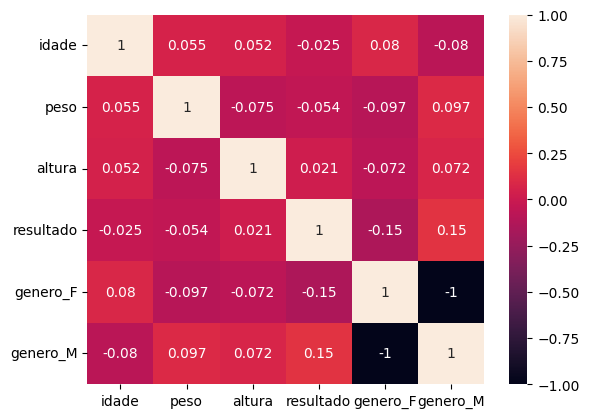

In [50]:
# Apresentar maap de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

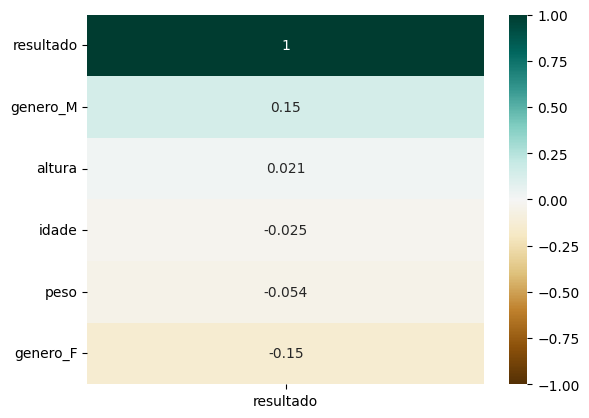

In [55]:
# Mapa de Correlação só com variável target(resultado)
sns.heatmap(df_exames.corr()[["resultado"]].sort_values(by="resultado", ascending=False),
            vmin=-1, vmax=1, annot=True, cmap="BrBG")

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


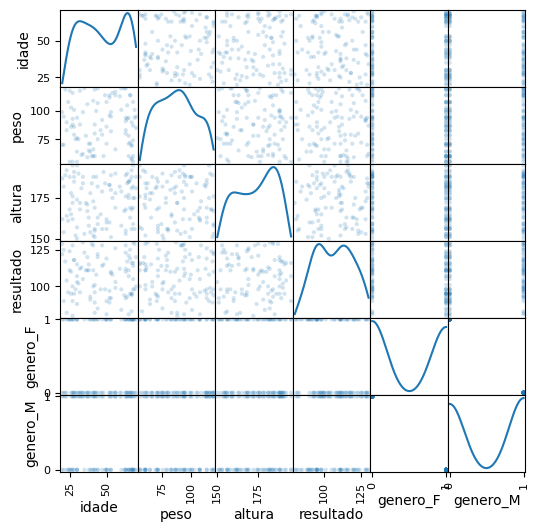

In [57]:
# Plot de Scatter (Dispersão) com Distribuição

pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal="kde")


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

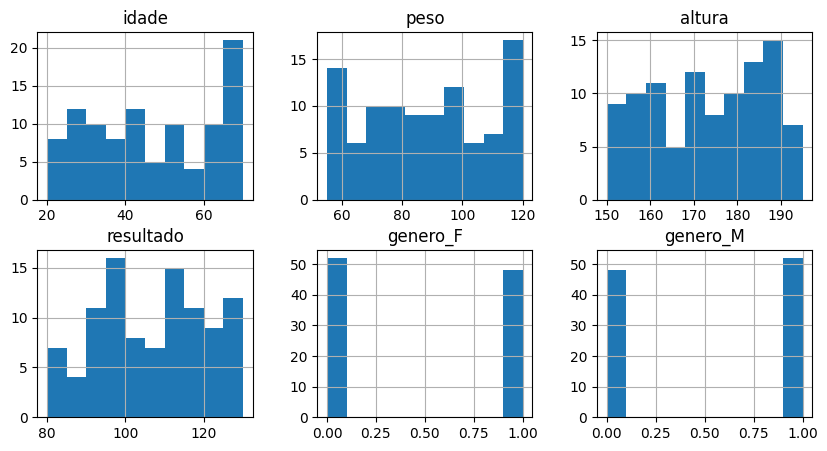

In [58]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2, 3), figsize=(10, 5))